In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In this file, we performed hierarchi clustering on the 58 features selected from K_mean clustering. See 'KMeans.ipynb' for how to obtain desired table from raw data. We presented:
1. Heatmap with columns representing 58 features and rows representing different patients.

In [5]:
# load data file
data = pd.read_csv('best_table.csv')
data

PATH_N_STAGE  M_C16ORF91  M_CTNNAL1  M_MAP6D1  M_HIST1H2AK  M_ASH1L-AS1  \
0             2.0      0.8792    -0.0361   -0.3510      -0.3868       0.0693   
1             1.0      1.1363    -0.2450   -0.2738      -0.1765       0.3303   
2             2.0     -0.7364    -0.3339   -1.1468      -0.1550       0.1437   
3             2.0     -0.9999    -1.2376   -0.4907      -0.2636      -0.2875   
4             2.0      2.6742    -0.2704   -0.6972      -0.7952      -0.2508   
..            ...         ...        ...       ...          ...          ...   
328           2.0     -1.3892     0.2992   -0.8179      -0.3634      -0.8512   
329           2.0     -0.6168    -0.5563    0.1017      -0.1894       0.1920   
330           2.0      0.8713     1.3086    0.9111       1.4000       1.0178   
331           1.0     -1.1250     1.3591   -0.6607      -0.1890      -0.9390   
332           2.0     -0.3876     0.3343   -0.7292      -0.4921      -0.5457   

     M_HIST1H3J  M_SPATA46  M_GOLGA1  M_PRSS27  ...  M_PDK3   M_MX2  M_NPLOC4  \
0       -0.2442    -0.6439    0.8551    0.1356  ...  0.2576 -0.1780    1.2191   
1        0.3021     0.2213    0.1103   -0.0034  ...  0.7041  0.0167   -0.1942   
2       -0.6287    -0.6439   -0.7200   -0.2643  ... -1.1569 -0.3613   -1.2243   
3       -0.6287     3.5319    0.7420    0.0393  ...  0.7630  0.2298    1.3228   
4       -0.6287    -0.6439   -0.4717   -0.6117  ... -1.2046 -0.0428    0.2360   
..          ...        ...       ...       ...  ...     ...     ...       ...   
328     -0.0060     0.5137    0.3913   -0.5895  ...  0.1421  0.0136   -0.8842   
329     -0.6287     0.3637    0.0425    0.3491  ...  0.0837  1.7001    0.8462   
330     -0.1033    -0.6439    3.4720    0.5115  ... -0.5804 -0.1413    1.6410   
331      0.5643     1.0194   -0.5864   -0.4240  ... -0.2846 -0.1055   -1.5739   
332     -0.6287    -0.1611   -0.2951   -0.3062  ... -0.5780  0.1099    0.1180   

     M_MLNR  M_PCDHGA5  M_GPR158  M_ISG15  M_CCDC155  M_HELZ2  M_GDI1  
0   -0.5143    -0.4845   -0.2599   0.9478    -0.4920  -0.3387  1.6090  
1    0.0413    -0.3949   -0.0983  -0.3691     2.3860  -0.4413 -0.5461  
2   -0.5143    -0.4556   -0.3587  -0.1979    -0.4920  -0.9119 -0.2510  
3   -0.3227    -0.4136   -0.5184  -0.3289    -0.4920   0.6660 -1.1541  
4   -0.5143    -0.4201   -0.5575  -0.3344     0.0726  -0.1918 -0.7227  
..      ...        ...       ...      ...        ...      ...     ...  
328 -0.1426    -0.2352    0.7186  -0.1929     0.1498   0.1860 -0.7003  
329 -0.3525    -0.3084   -0.2432   1.1839    -0.0731   2.3893  0.0340  
330  0.8972     2.6051    1.2684  -0.1648     3.1636   2.5558  2.2978  
331 -0.5143    -0.3152    0.3883  -0.2848    -0.4920  -0.5368 -0.7524  
332 -0.5143    -0.4384   -0.4810  -0.0192    -0.0905   0.0179 -0.4973  

[333 rows x 59 columns]

In [9]:
X = data.iloc[:,1:]
y = data['PATH_N_STAGE']

### Hierarchical clustering
Hierarcical clustering separates the samples according to their distance to each other. It could provide a hierarchy to determine the distance between different clusters.

In an attempt to mimic the graph from the paper, both y-axis and x-axis used single linkage, which is also known as the nearest-neighbor method or the minimum method. 

In [12]:
# Compute the mean and standard deviation of each row
mean = np.mean(X, axis=1)
std_dev = np.std(X, axis=1)

# Normalize the data by subtracting the mean and dividing by the standard deviation
X_normalized = (X - mean[:, np.newaxis]) / std_dev[:, np.newaxis]
scaled_pd = pd.DataFrame(X_normalized)

# Verify that the normalized row has standard deviation of 1
std_dev_normalized = np.std(X_normalized,axis = 1)
print(std_dev_normalized)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
328    1.0
329    1.0
330    1.0
331    1.0
332    1.0
Length: 333, dtype: float64


/tmp/ipykernel_1786373/1484764585.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_normalized = (X - mean[:, np.newaxis]) / std_dev[:, np.newaxis]


In [24]:
# Perform hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=2)
clustering.fit(X_normalized)

# Get the cluster labels
y_pred = clustering.labels_

In [25]:
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [62]:
#notice that every time we run the function, our y_pred_labeled changed. I don't like this
def label_ypred(y_predict):
    y_pred = y_predict+1.0
    #y_predict[y_predict == 0] = 2.0
    #y_pred = pd.DataFrame(y_predict)+0.0
    y_pred = y_predict
    return y_pred

In [66]:
y_pred_labeled = label_ypred(y_pred)
y_pred_labeled

array([2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2,

2 represents N0 stage and 1 represents N1 stage

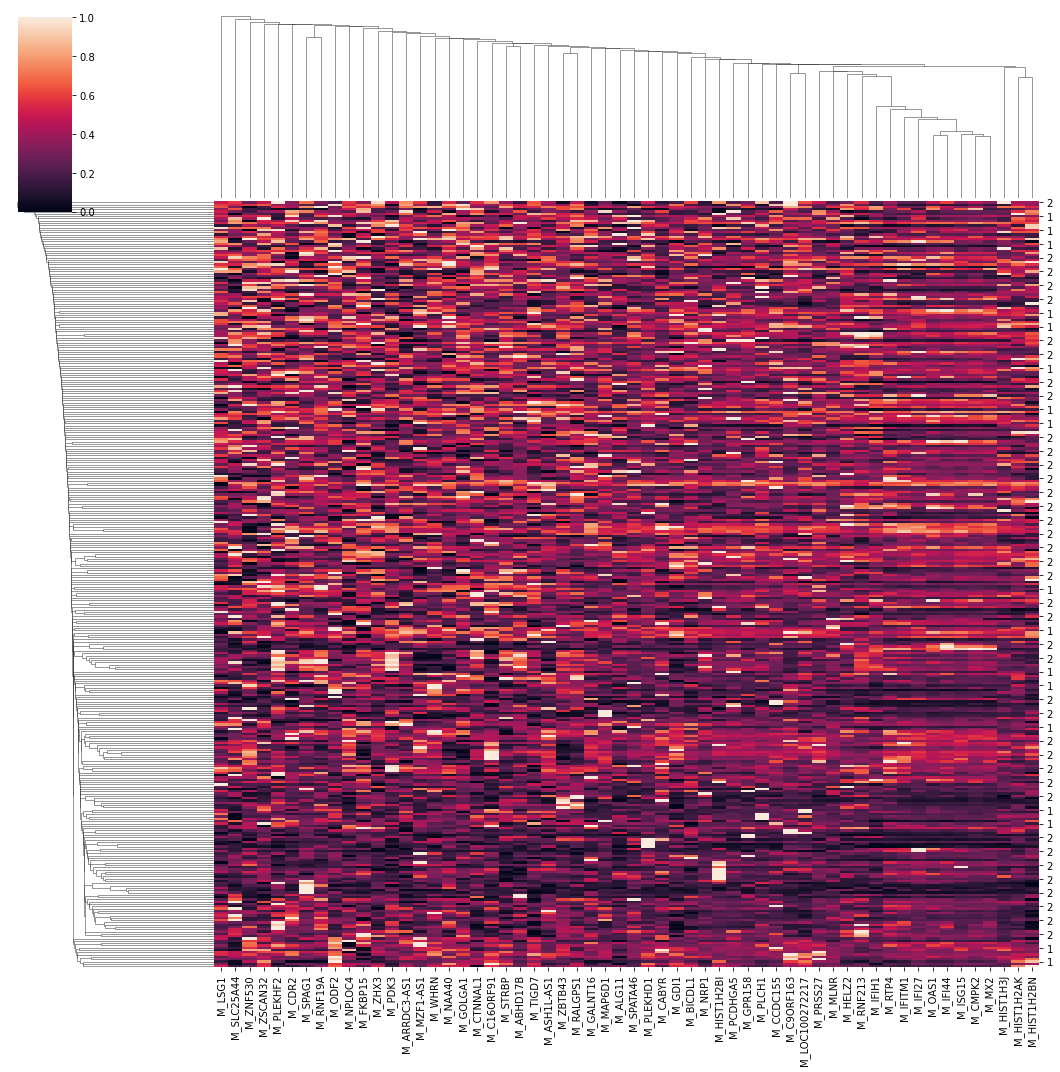

In [67]:
# Apply the custom function to the distance metric in clustermap
clustergrid = sns.clustermap(X_normalized, method='single', standard_scale=0, figsize=(15,15), row_cluster=True)

# Get the row indices that are shown in the heatmap
shown_rows = clustergrid.dendrogram_row.reordered_ind
col_index = clustergrid.dendrogram_col.reordered_ind

# Retrieve tick locations and labels
tick_locs = clustergrid.ax_heatmap.get_yticks()
tick_labels = clustergrid.ax_heatmap.get_yticklabels()
rows= []
# Print rows associated with each tick location
for i, loc in enumerate(tick_locs):
    rows.append(int(tick_labels[i].get_text()))
y_labels = y_pred_labeled[rows]

# Set ytick labels with larger font size
clustergrid.ax_heatmap.set_yticklabels(y_labels, fontsize=10)
#I don't know how to reduce the distance of the branch properly

clustergrid.savefig("clustermap.png")

There are more label 1 in the samples with higher experssion data and lower expression data region. This is in accordance with our expectation 